In [21]:
include("OTOC.jl")
using Plots
using CUDA

## Phenomenological model

A one-dimensional model with local two-state degrees of freedom,for example, the random XXZ-model
$$
H = \sum_i J_\perp (s_i^x s_{i+1}^x + s_i^y s_{i+1}^y) + J_z s_i^z s_{i+1}^z + h_i s^z_i
$$
was proposed as a phenomennological model for an MBL phase

$$H = \sum_i h_i \tau_i^z + \sum_{i,j} J_{ij }\tau_j \tau_j$$

$h_i$ are random Zeeman field in "l-bit",$J_{ij} = \tilde{J}_{ij} \text{exp}(-|i-j|/\xi)$,describes interaction between different l-bits,and $\tilde{j}_{ij}$ are uniformly distributed between $[-J, J]$,when $J=0$ , it become Andersen Localization.

The infinite temperature otoc:
$$
    F(t) = \frac{1}{2^D}\sum_n \langle n|U^\dagger\tau_i^xu\tau_j^xU\tau_i^xU^\dagger\tau_j^x|n\rangle
$$

### 增大无序性（通过增大h实现）

In [3]:
h1 = xxz(5, 1,0.2,0);

h2 = xxz(5, 1,0.2,3);

h3 = xxz(5, 1,0.2,5);

h4 = xxz(5, 1,0.2,10);

In [22]:
tlist = 10 .^ range(-4,10,length = 120);
CUDA.@sync
y1 = real([sum([cu_inf_otoc(X,X; t=t,hamiltonian=h1,nbit=5, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
y2 = real([sum([cu_inf_otoc(X,X; t=t,hamiltonian=h2,nbit=5, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
y3 = real([sum([cu_inf_otoc(X,X; t=t,hamiltonian=h3,nbit=5, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);
y4 = real([sum([cu_inf_otoc(X,X; t=t,hamiltonian=h4,nbit=5, i=5,j=1) for _ in 1:1000])/1000 for t in tlist]);

LoadError: InterruptException:

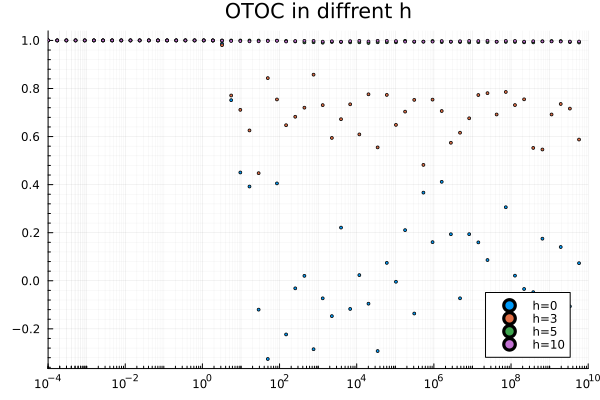

In [18]:
scatter(tlist,[y1,y2,y3,y4],xscale=:log10,minorgrid=true,ms=1.6,label=["h=0" "h=3" "h=5" "h=10"])
xlims!(1e-4,1e+10)
title!("OTOC in diffrent h")

### 通过增大$J_Z$

In [ ]:
z1 = xxz(5,1,0,5); ## AL
z2 = xxz(5,1,0.2,5); ## Zhai's paper
z3 = xxz(5,1,1,5); ## Heisenberg
z4 = xxz(5,1,2,5);
z5 = xxz(5,1,5,5);